# CS251/2: Data Analysis and Visualization

## Multiple Linear Regression

Spring 2021

Oliver W. Layton

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lstsq

In [2]:
import data

## Load in Waffle House data

CSV filename: `WaffleDivorce.csv`

In [3]:
waffleData = data.Data('WaffleDivorce.csv')
print(waffleData)

-------------------------------
WaffleDivorce.csv (50x8)
Headers:
  Population	MedianAgeMarriage	Marriage	Marriage SE	Divorce	Divorce SE	WaffleHouses	South
-------------------------------
Showing first 5/50 rows.
4.78	25.3	20.2	1.27	12.7	0.79	128.0	1.0
0.71	25.2	26.0	2.93	12.5	2.05	0.0	0.0
6.33	25.8	20.3	0.98	10.8	0.74	18.0	0.0
2.92	24.3	26.4	1.7	13.5	1.22	41.0	1.0
37.25	26.8	19.1	0.39	8.0	0.24	0.0	0.0

-------------------------------


## 1. Warm-up: Simple linear regression

Let's do a simple linear regression to quantify the association between:
- Number of Waffle House diners per million people in a state
- 2009 divorce rate in each state

Let's try and predict **divorce rate** from **number of Waffle Houses**.

Linear regression model:

$$y = c_0 + c_1x_1$$

What is $x_1$?

In [ ]:
# x1 = Number of Waffle Houses in a state = ind var

We need to determine $A$ and $\vec{y}$ to solve for $\vec{c}$: $$\vec{y} = A\vec{c}$$

In [4]:
x = waffleData.select_data(['WaffleHouses'])
y = waffleData.select_data(['Divorce'])
A = np.hstack([np.ones([x.shape[0], 1]), x])

In [5]:
c, _, _, _ = lstsq(A, y)
print(c)

[[9.46023124e+00]
 [7.04294245e-03]]


In [6]:
x = np.linspace(np.min(A[:, 1]), np.max(A[:, 1]))
yLine = c[0] + c[1]*x

Let's draw the regression line!

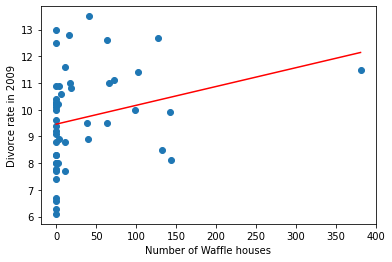

In [7]:
plt.scatter(A[:, 1], y)
plt.plot(x, yLine, 'r')
plt.xlabel('Number of Waffle houses')
plt.ylabel('Divorce rate in 2009')
plt.show()

What do you make of the results?

## 2. Predict number of divorce rate from two independent variables

Let's fit a linear regression model (**multiple linear regression**) predict divorce rate from:

- Population
- MedianAgeMarriage

Independent variables? Dependent variables?

In [8]:
# ind vars: Population, MedianAgeMarriage
# dep var: divorce rate

Let's follow the same steps to set this up, but for practice, let's reorder the linear regression model slope and intercept:

$$y = c_0 + c_1x_1 + c_2x_2$$

What variables do you want to define as $x_1$ and $x_2$?

**Good news:** We don't need to change hardly anything when solving the least squares problem when adding more than 1 independent variable!

In [9]:
x1 = waffleData.select_data(['Population'])
x2 = waffleData.select_data(['MedianAgeMarriage'])
y = waffleData.select_data(['Divorce'])

In [11]:
A = np.hstack([np.ones([x1.shape[0], 1]), x1, x2])
print(A[:5, :])
A.shape

[[ 1.    4.78 25.3 ]
 [ 1.    0.71 25.2 ]
 [ 1.    6.33 25.8 ]
 [ 1.    2.92 24.3 ]
 [ 1.   37.25 26.8 ]]


(50, 3)

In [13]:
c, _, _, _ = lstsq(A, y)
print(c)

[[31.59532513]
 [-0.03908454]
 [-0.83166283]]


In [16]:
# x = np.linspace(np.min(x1), np.max(x1))
yPredsOnLine = c[0] + c[1]*x1 + c[2]*x2 # for my original data
#yPredsOnLine

We can/should compute $R^2$ and MSSE for multiple linear regression, just like before, but we won't do that here.

We can plot the residuals to get an intuitive sense of how well the regression model fits the data.

In [18]:
yPredsOnLine.shape

(50, 1)

In [19]:
y.shape

(50, 1)

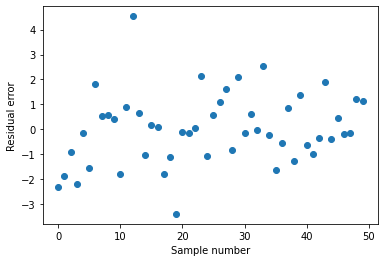

In [22]:
plt.plot(yPredsOnLine - y, 'o')
plt.xlabel('Sample number')
plt.ylabel('Residual error')
plt.show()